# FIPY Script to solve 1D heat/diffusion equation

### Importing All necessary modules from FIPy

In [1]:
from fipy import * #imports all fipy modules
from scipy.special import erf
from fipy.tools import numerix

### Defining the grid mesh to hold Cell Variables

In [2]:
mesh = Grid1D(nx = 50.0, dx = 1.0) #creating a mesh to hold a 1d solution set
phi = CellVariable(name="Solution Variable", mesh=mesh,value=0.0) #sets the variable phi that will contain the solution set
phiAnalytical = CellVariable(name="Ananlytical Value", mesh=mesh) #sets the analytical value, to measure accuracy of solution variable
print(phi)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


### Placing constraints on the Phi variable as seen below

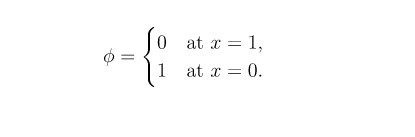

In [3]:
val_Left = 1 #Value for left boundary condition
val_Right = 0 #Value for right boundary condition
dx = 1
D = 1

#Setting the boundary conditions below
phi.constrain(val_Left, mesh.facesLeft)
phi.constrain(val_Right, mesh.facesRight)

#Representation of Equation using modules import from the fipy Object
diffusionEquation = TransientTerm() == ExplicitDiffusionTerm(coeff=D)

timeStepDuration = 0.9 * ( dx**2/(2*D) ) #The largest stable timestep that can be taken, limit steps to 90%
steps = 100

### Defining the analytical solution of the 1D PDE

In [4]:
x = mesh.cellCenters[0]
t = timeStepDuration*steps

phiAnalytical.setValue(1 - erf(x / (2 * numerix.sqrt(D * t))))  #generates analytical equation

### Creating View Object for plotting

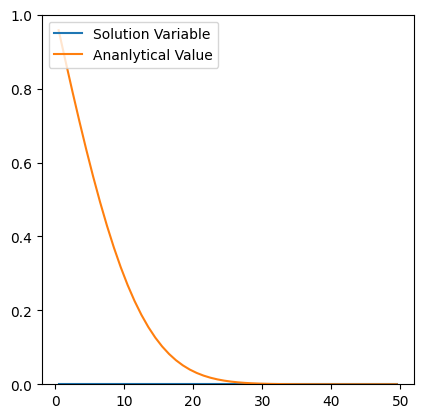

In [5]:
view = Viewer(vars=(phi,phiAnalytical), datamin=0.0, datamax=1.0)

### Running a for loop to solve the eqution for different range of steps

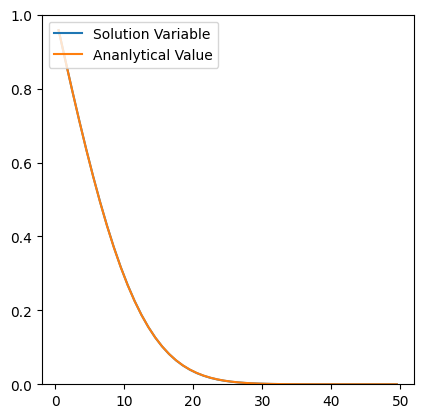

[9.58046988e-01 8.74601473e-01 7.92522465e-01 7.12671722e-01
 6.35839905e-01 5.62723457e-01 4.93906344e-01 4.29847405e-01
 3.70873689e-01 3.17179752e-01 2.68832534e-01 2.25781092e-01
 1.87870264e-01 1.54857142e-01 1.26429233e-01 1.02223153e-01
 8.18428657e-02 6.48765960e-02 5.09117714e-02 3.95475605e-02
 3.04047823e-02 2.31331582e-02 1.74160434e-02 1.29728892e-02
 9.55978029e-03 6.96842333e-03 5.02398007e-03 3.58211227e-03
 2.52556856e-03 1.76058949e-03 1.21334886e-03 8.26591279e-04
 5.56572233e-04 3.70360672e-04 2.43526763e-04 1.58209178e-04
 1.01536700e-04 6.43668911e-05 4.02986195e-05 2.49140316e-05
 1.52075590e-05 9.16363073e-06 5.44989424e-06 3.19821074e-06
 1.85095881e-06 1.05494889e-06 5.89346343e-07 3.17377313e-07
 1.54266168e-07 4.58899028e-08]


In [6]:
for step in range(steps): #loop to generates solution set of pde
    diffusionEquation.solve(var=phi, dt=timeStepDuration)

view.plot()
print(phi)